## Baseline Model

### Evaluate the pre-trained model without too much further training (train with 1 image)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
from keras.preprocessing import image
## tensorboard
from time import time
## model
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing

Using TensorFlow backend.


In [24]:
from helper import *

### global variable

In [8]:
# define backbone name
BACKBONE = 'resnet34'

### data

In [16]:
# mask values: 0 or 255
img = image.load_img("../../data/sample_data/train_image/20180503_ANIMAL1_0min.jpg", 
                     target_size=(224, 224)) # shape(244,244,3)
mask = image.load_img("../../data/sample_data/train_mask/20180503_ANIMAL1_0min_ROI.png", 
                      target_size=(224, 224)) # shape(244,244,3)

# PIL image object to np.array
x = image.img_to_array(img) # shape(244,244,3)
y = image.img_to_array(mask).mean(axis=2)/255 # shape(244,244)

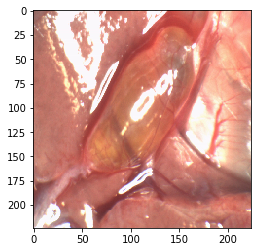

In [17]:
### visualize image/mask
plt.imshow(img)

### train model

1 training image, 5 epoch

In [18]:
preprocessing_fn = get_preprocessing(BACKBONE)
x = preprocessing_fn(x)

In [19]:
x = x.reshape((1,224,224,3))
y = y.reshape((1,224,224,1))

In [33]:
# prepare model
model = Unet(backbone_name=BACKBONE, encoder_weights='imagenet')
model.compile('Adam', loss = customLoss, metrics = ['binary_accuracy',jaccard, dice])

# train model
history = model.fit(x, y, epochs= 5,verbose = 1)

Epoch 1/5
1/1 [==============================] - 19s 19s/step - loss: 2.6873 - binary_accuracy: 0.6623 - jaccard: 0.1265 - dice: 0.2246
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 1.9865 - binary_accuracy: 0.6482 - jaccard: 0.2245 - dice: 0.3667
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 1.4610 - binary_accuracy: 0.7397 - jaccard: 0.3274 - dice: 0.4933
Epoch 4/5
1/1 [==============================] - 3s 3s/step - loss: 1.2318 - binary_accuracy: 0.7499 - jaccard: 0.3926 - dice: 0.5638
Epoch 5/5
1/1 [==============================] - 3s 3s/step - loss: 1.0644 - binary_accuracy: 0.7589 - jaccard: 0.4499 - dice: 0.6205


In [34]:
# model result
ypred = model.predict(x)

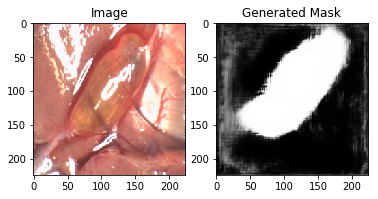

<Figure size 432x288 with 0 Axes>

In [36]:
## visualize
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(np.dstack((ypred[0], ypred[0], ypred[0])))
plt.title("Generated Mask")
plt.show()
#plt.savefig("result/pretrain_1image_5epoch.jpg")